In [1]:
# 导入NumPy数学工具箱
import numpy as np 
# 导入Pandas数据处理工具箱
import pandas as pd
# 从 Keras中导入 mnist数据集
from keras.datasets import mnist

#读入训练集和测试集
(X_train_image, y_train_lable), (X_test_image, y_test_lable) =  mnist.load_data() 

In [2]:
print ("特征集张量形状：", X_train_image.shape) #用shape方法显示张量的形状
print ("第一个数据样本：\n", X_train_image[0]) #注意Python的索引是从0开始的

特征集张量形状： (60000, 28, 28)
第一个数据样本：
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0

In [3]:
print ("第一个数据样本的标签：", y_train_lable[0])

第一个数据样本的标签： 5


In [4]:
# 导入keras.utils工具箱的类别转换工具
from tensorflow.keras.utils import to_categorical
# 给标签增加维度,使其满足模型的需要
# 原始标签，比如训练集标签的维度信息是[60000, 28, 28, 1]
X_train = X_train_image.reshape(60000,28,28,1)
X_test = X_test_image.reshape(10000,28,28,1)
# 特征转换为one-hot编码
y_train = to_categorical(y_train_lable, 10)
y_test = to_categorical(y_test_lable, 10)

In [5]:
# 从 keras 中导入模型
from keras import models 
# 从 keras.layers 中导入神经网络需要的计算层
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
# 构建一个最基础的连续的模型，所谓连续，就是一层接着一层
model = models.Sequential()
# 第一层为一个卷积，卷积核大小为(3,3), 输出通道32，使用 relu 作为激活函数
model.add(Conv2D(32, (3, 3), activation='relu', 
                 input_shape=(28,28,1)))
# 第二层为一个最大池化层，池化核为（2,2)
# 最大池化的作用，是取出池化核（2,2）范围内最大的像素点代表该区域
# 可减少数据量，降低运算量。
model.add(MaxPooling2D(pool_size=(2, 2)))
# 又经过一个（3,3）的卷积，输出通道变为64，也就是提取了64个特征。
# 同样为 relu 激活函数
model.add(Conv2D(64, (3, 3), activation='relu'))
# 上面通道数增大，运算量增大，此处再加一个最大池化，降低运算
model.add(MaxPooling2D(pool_size=(2, 2)))
# dropout 随机设置一部分神经元的权值为零，在训练时用于防止过拟合
# 这里设置25%的神经元权值为零
model.add(Dropout(0.25)) 
# 将结果展平成1维的向量
model.add(Flatten())
# 增加一个全连接层，用来进一步特征融合
model.add(Dense(128, activation='relu'))
# 再设置一个dropout层，将50%的神经元权值为零，防止过拟合
# 由于一般的神经元处于关闭状态，这样也可以加速训练
model.add(Dropout(0.5)) 
# 最后添加一个全连接+softmax激活，输出10个分类，分别对应0-9 这10个数字
model.add(Dense(10, activation='softmax'))

In [6]:
# 编译上述构建好的神经网络模型
# 指定优化器为 rmsprop
# 制定损失函数为交叉熵损失
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# 开始训练              
model.fit(X_train, y_train, # 指定训练特征集和训练标签集
          validation_split = 0.3, # 部分训练集数据拆分成验证集
          epochs=5, # 训练轮次为5轮
          batch_size=128) # 以128为批量进行训练

Epoch 1/5
329/329 [==============================] - 20s 60ms/step - loss: 1.2911 - accuracy: 0.8003 - val_loss: 0.1663 - val_accuracy: 0.9514
Epoch 2/5
329/329 [==============================] - 19s 59ms/step - loss: 0.2070 - accuracy: 0.9440 - val_loss: 0.1095 - val_accuracy: 0.9718
Epoch 3/5
329/329 [==============================] - 20s 60ms/step - loss: 0.1471 - accuracy: 0.9595 - val_loss: 0.0622 - val_accuracy: 0.9822
Epoch 4/5
329/329 [==============================] - 20s 60ms/step - loss: 0.1208 - accuracy: 0.9678 - val_loss: 0.0610 - val_accuracy: 0.9838
Epoch 5/5
329/329 [==============================] - 20s 60ms/step - loss: 0.1012 - accuracy: 0.9724 - val_loss: 0.0644 - val_accuracy: 0.9820


In [8]:
# 在测试集上进行模型评估
score = model.evaluate(X_test, y_test) 
print('测试集预测准确率:', score[1]) # 打印测试集上的预测准确率

313/313 [==============================] - 2s 6ms/step - loss: 0.0529 - accuracy: 0.9848
测试集预测准确率: 0.9847999811172485


1/1 [==============================] - 0s 136ms/step
[9.66516262e-15 1.89119055e-12 4.02508826e-09 9.05649167e-11
 7.17695167e-15 6.04624823e-16 8.34067861e-20 1.00000000e+00
 1.61423524e-14 1.06444846e-10] 转换一下格式得到： 7


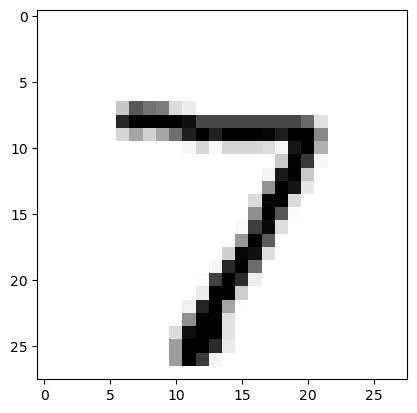

In [9]:
# 预测验证集第一个数据
pred = model.predict(X_test[0].reshape(1, 28, 28, 1)) 
# 把one-hot码转换为数字
print(pred[0],"转换一下格式得到：",pred.argmax())
 # 导入绘图工具包
import matplotlib.pyplot as plt
# 输出这个图片
plt.imshow(X_test[0].reshape(28, 28),cmap='Greys')